In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
df = pd.read_excel("vitA9thdoseunder52008-2013_1.xlsx")

In [ ]:
df.head()

,Categories,State,2009-10-Need Assessed (in 000s),2009-10-Achieved (under 5 year),2009-10-% Achieved,2010-11-Need Assessed (in 000s),2010-11-Achieved (under 5 year),2010-11-% Achieved,2011-12*-Need Assessed (in 000s),2011-12*-Achieved (under 5 year),2011-12*-% Achieved,2012-13*-Need Assessed (in 000s),2012-13*-Achieved (under 5 year),2012-13*-% Achieved,mean_assesed,mean_achieved,percentage
0,Major States (Population >20 million),Andhra Pradesh,1463,826361.0,56.5,1477,1180197,79.9,1369,328516,24.0,1381,759882,55.0,1422500,773739.00,54.392900
1,Major States (Population >20 million),Assam,657,199046.0,30.3,665,248849,37.4,592,339391,57.3,599,306384,51.1,628250,273417.50,43.520493
2,Major States (Population >20 million),Bihar,2471,287986.0,11.7,2506,92663,3.7,2188,244195,11.2,2216,198181,8.9,2345250,205756.25,8.773318
3,Major States (Population >20 million),Chattisgarh,544,392621.0,72.2,551,433705,78.7,526,421015,80.0,533,529428,99.3,538500,444192.25,82.486955
4,Major States (Population >20 million),Gujarat,1129,2049607.0,181.5,1145,1807742,157.9,1082,1475387,136.4,1096,1085176,99.0,1113000,1604478.00,144.157951


In [ ]:
df.describe()

,2009-10-Need Assessed (in 000s),2009-10-Achieved (under 5 year),2009-10-% Achieved,2010-11-Need Assessed (in 000s),2010-11-Achieved (under 5 year),2010-11-% Achieved,2011-12*-Need Assessed (in 000s),2011-12*-Achieved (under 5 year),2011-12*-% Achieved,2012-13*-Need Assessed (in 000s),2012-13*-Achieved (under 5 year),2012-13*-% Achieved,mean_assesed,mean_achieved,percentage
count,35.000000,3.400000e+01,34.000000,35.000000,3.500000e+01,35.000000,35.000000,3.500000e+01,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01,3.500000e+01,35.000000
mean,701.200000,3.887651e+05,50.388235,711.057143,3.843022e+05,48.742857,654.828571,3.272765e+05,52.640000,663.428571,2.889336e+05,45.811429,6.826286e+05,3.445531e+05,49.114173
std,995.346845,5.371076e+05,43.078770,1011.281160,5.209422e+05,37.776536,953.501118,4.456125e+05,41.518941,968.193597,4.091838e+05,34.023658,9.816308e+05,4.589445e+05,35.189829
min,1.000000,1.900000e+01,1.900000,1.000000,3.470000e+02,3.700000,1.000000,3.700000e+02,6.300000,1.000000,4.070000e+02,4.300000,1.000000e+03,3.912500e+02,8.773318
25%,29.500000,7.784000e+03,16.500000,30.500000,5.594000e+03,21.700000,20.500000,6.179500e+03,15.950000,21.000000,7.816000e+03,17.950000,2.487500e+04,7.243625e+03,22.095344
50%,322.000000,1.548610e+05,41.750000,331.000000,9.217500e+04,37.400000,254.000000,1.202040e+05,43.300000,261.000000,6.639200e+04,36.200000,2.920000e+05,1.437628e+05,43.003268
75%,1050.500000,7.184475e+05,61.975000,1059.000000,6.321990e+05,70.500000,1039.500000,4.882030e+05,73.750000,1051.500000,5.041775e+05,62.800000,1.054000e+06,5.428582e+05,60.183044
max,4873.000000,2.049607e+06,181.500000,4960.000000,1.807742e+06,157.900000,4805.000000,1.777310e+06,161.400000,4887.000000,1.465001e+06,132.200000,4.881250e+06,1.604478e+06,144.157951


{'boxes': [<matplotlib.lines.Line2D at 0x7fe7c4c49b90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe7c4aac790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe7c4ab1810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe7c4ab1210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe7c4aa8cd0>,
  <matplotlib.lines.Line2D at 0x7fe7c4aac150>]}

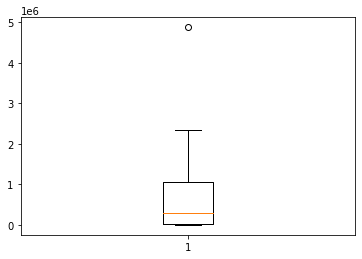

In [ ]:
plt.boxplot(df.mean_assesed)

In [ ]:
per = df.sort_values(by="percentage", ascending=False)
per

,Categories,State,2009-10-Need Assessed (in 000s),2009-10-Achieved (under 5 year),2009-10-% Achieved,2010-11-Need Assessed (in 000s),2010-11-Achieved (under 5 year),2010-11-% Achieved,2011-12*-Need Assessed (in 000s),2011-12*-Achieved (under 5 year),2011-12*-% Achieved,2012-13*-Need Assessed (in 000s),2012-13*-Achieved (under 5 year),2012-13*-% Achieved,mean_assesed,mean_achieved,percentage
4,Major States (Population >20 million),Gujarat,1129,2049607.0,181.5,1145,1807742,157.9,1082,1475387,136.4,1096,1085176,99.0,1113000,1.604478e+06,144.157951
14,Major States (Population >20 million),Tamil Nadu,1041,1533956.0,147.4,1047,1333462,127.4,1101,1777310,161.4,1108,1465001,132.2,1074250,1.527432e+06,142.185920
20,Smaller States,Himachal Pradesh,119,174129.0,146.3,121,155915,128.9,114,120204,105.4,115,124803,108.5,117250,1.437628e+05,122.612154
11,Major States (Population >20 million),Odisha,766,752756.0,98.3,773,694263,89.8,706,720306,102.0,712,777566,109.2,739250,7.362228e+05,99.590497
3,Major States (Population >20 million),Chattisgarh,544,392621.0,72.2,551,433705,78.7,526,421015,80.0,533,529428,99.3,538500,4.441922e+05,82.486955
7,Major States (Population >20 million),Karnataka,1060,974072.0,91.9,1071,1012789,94.6,997,555391,55.7,1007,494250,49.1,1033750,7.591255e+05,73.434148
19,Smaller States,Goa,33,19031.0,57.7,34,21423,63.0,21,19347,92.1,22,19629,89.2,27500,1.985750e+04,72.209091
9,Major States (Population >20 million),Madhya Pradesh,1684,963329.0,57.2,1712,1350167,78.9,1607,1180771,73.5,1632,1152401,70.6,1658750,1.161667e+06,70.032675
6,Major States (Population >20 million),Jharkhand,723,615522.0,85.1,733,72897,9.9,629,948673,150.8,637,27136,4.3,680500,4.160570e+05,61.139897
26,Smaller States,Sikkim,12,7610.0,63.4,12,3542,29.5,9,6661,74.0,9,7062,78.5,10500,6.218750e+03,59.226190


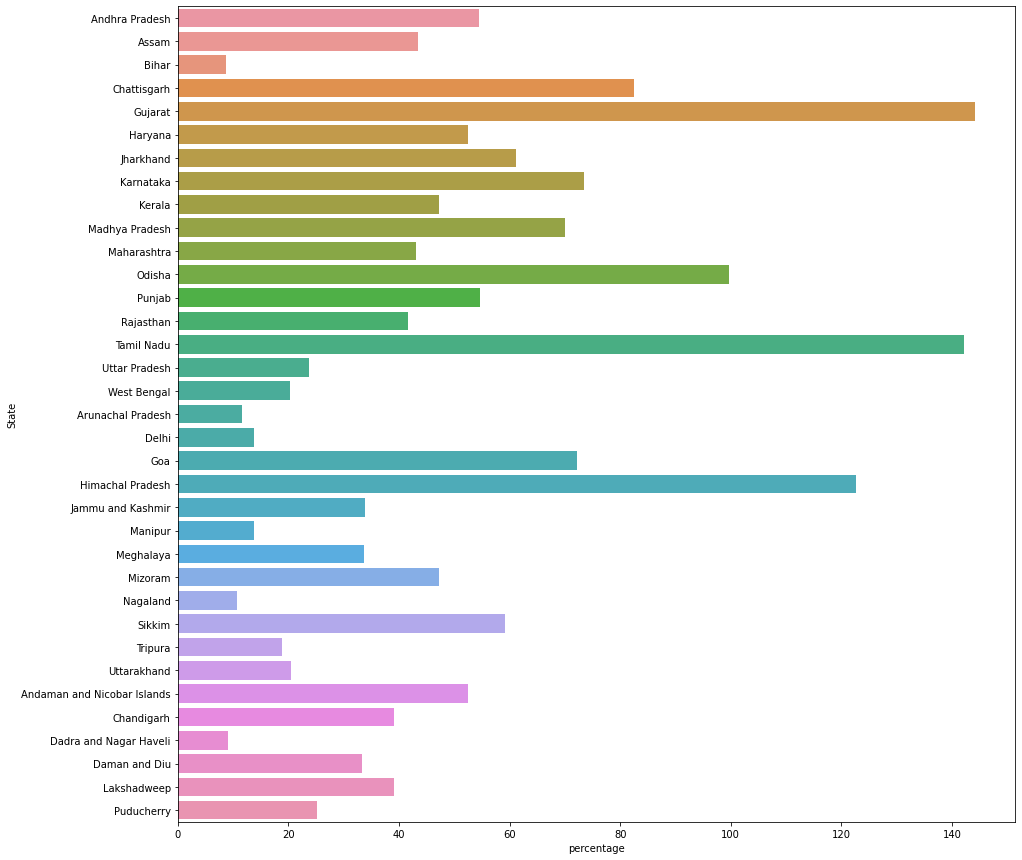

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x=df['percentage'], y = df['State'], orient='h');

**HIERARCHICAL CLUSTERING**

In [ ]:
x=df.iloc[:,14:].values

**Ploting Dendrogram**

Text(0, 0.5, 'euclidean')

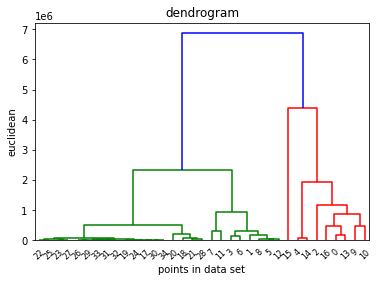

In [ ]:
import scipy.cluster.hierarchy as hie
den=hie.dendrogram(hie.linkage(x,method='ward'))
plt.title('dendrogram')
plt.xlabel('points in data set')
plt.ylabel('euclidean')

**Creating Clustering using Hierarchical Clustering**


In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2)
pred=ac.fit_predict(x)

In [ ]:
df['clusters'] = pred
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]

**Pie chart representation of Clusters**

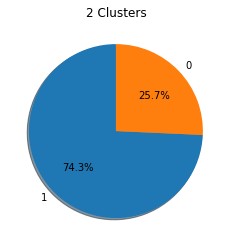

In [ ]:
c4=df['clusters'].value_counts()
g = plt.pie(c4, labels=c4.index,
            autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('2 Clusters')
plt.show()

No handles with labels found to put in legend.


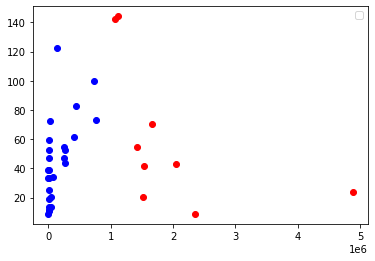

In [ ]:
plt.scatter(df1['mean_assesed'],df1['percentage'],c='red')
plt.scatter(df2['mean_achieved'],df2['percentage'],c='blue')
plt.legend()

**Bar Chart Representation for the major attributes in Dataset**

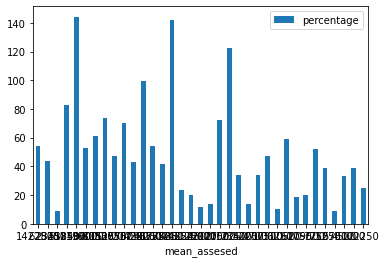

In [ ]:
df.plot.bar(x='mean_assesed', y='percentage', rot=0)

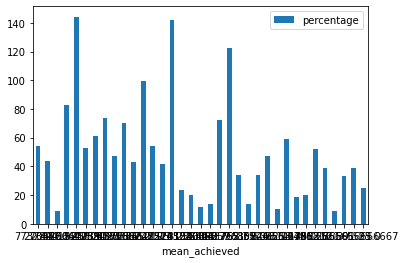

In [ ]:
df.plot.bar(x='mean_achieved', y='percentage', rot=0)

**K-MEANS CLUSTERING**

**Elbow Method**


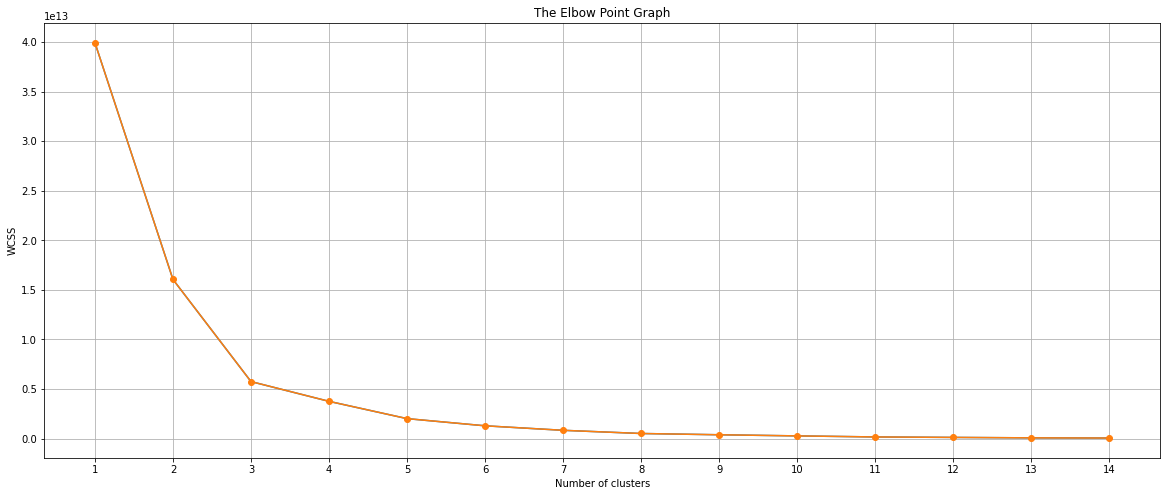

In [ ]:
from sklearn.cluster import KMeans
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(20, 8))
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(1, 15), wcss, "-o")
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

**3D representation**

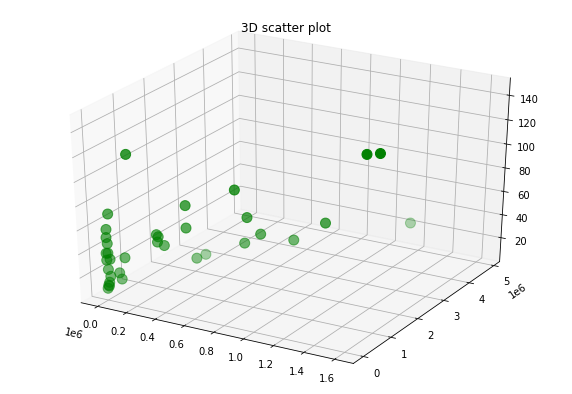

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(df['mean_achieved'], df['mean_assesed'],df['percentage'], color = "green",s=100)
plt.title("3D scatter plot")
plt.show()

In [ ]:
kmeans=KMeans(init='k-means++',n_clusters=4,random_state=0) #k-means++ is used to avoid random initialization trap
kmeans.fit(x)
pred=kmeans.predict(x)

**Pie chart representation of Clusters**

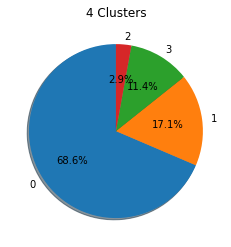

In [ ]:
df['clusters4']=pred
c4=df['clusters4'].value_counts()
g = plt.pie(c4, labels=c4.index,
            autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('4 Clusters')
plt.show()

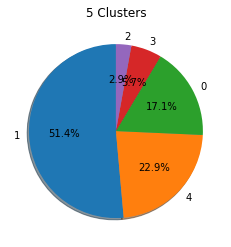

In [ ]:
kmeans1=KMeans(init='k-means++',n_clusters=5,random_state=0)
kmeans1.fit(x)
pred1=kmeans1.predict(x)
df['clusters5']=pred1
c5=df['clusters5'].value_counts()
g = plt.pie(c5, labels=c5.index,
            autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
plt.show()

**Creating Clustering using Hierarchical Clustering**

**For 4 Optimal Clusters**

<function matplotlib.pyplot.show>

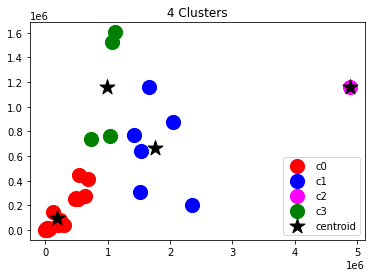

In [ ]:
plt.scatter(x[pred==0,0],x[pred==0,1],color='red',label='c0',s=200)
plt.scatter(x[pred==1,0],x[pred==1,1],color='blue',label='c1',s=200)
plt.scatter(x[pred==2,0],x[pred==2,1],color='magenta',label='c2',s=200)
plt.scatter(x[pred==3,0],x[pred==3,1],color='green',label='c3',s=200)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',s=250,label='centroid')
plt.legend()
plt.title('4 Clusters')
plt.show

**For 5 Optimal Clusters**

<function matplotlib.pyplot.show>

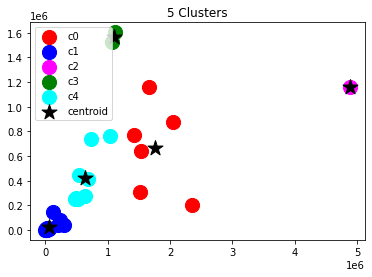

In [ ]:
plt.scatter(x[pred1==0,0],x[pred1==0,1],color='red',label='c0',s=200)
plt.scatter(x[pred1==1,0],x[pred1==1,1],color='blue',label='c1',s=200)
plt.scatter(x[pred1==2,0],x[pred1==2,1],color='magenta',label='c2',s=200)
plt.scatter(x[pred1==3,0],x[pred1==3,1],color='green',label='c3',s=200)
plt.scatter(x[pred1==4,0],x[pred1==4,1],color='cyan',label='c4',s=200)
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],color='black',marker='*',s=250,label='centroid')
plt.legend()
plt.title('5 Clusters')
plt.show

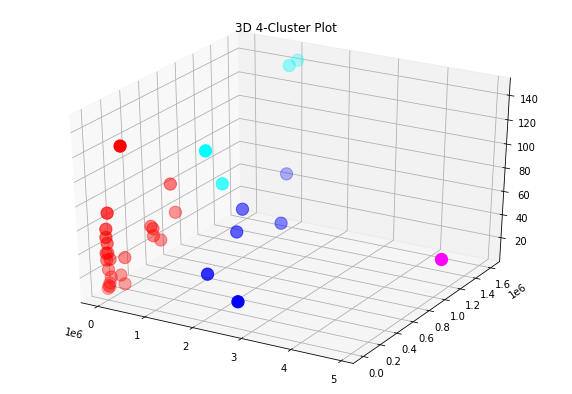

In [ ]:
fig1 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x[pred == 0, 0],x[pred == 0, 1],x[pred == 0, 2], color = "red",s=150)
ax.scatter3D(x[pred == 1, 0],x[pred == 1, 1],x[pred == 1, 2], color = "blue",s=150)
ax.scatter3D(x[pred == 2, 0],x[pred == 2, 1],x[pred == 2, 2], color = "magenta",s=150)
ax.scatter3D(x[pred == 3, 0],x[pred == 3, 1],x[pred == 3, 2], color = "cyan",s=150)
plt.title("3D 4-Cluster Plot")
plt.show()

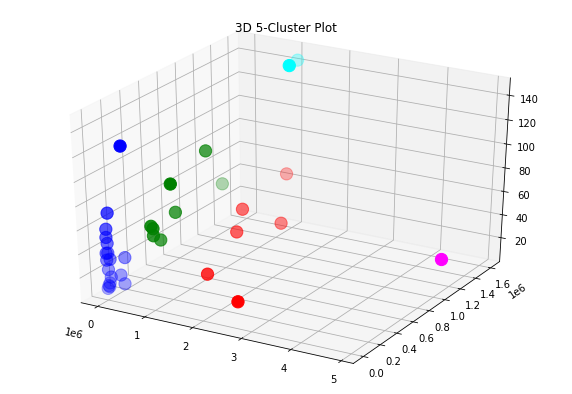

In [ ]:
fig2 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x[pred1 == 0, 0],x[pred1 == 0, 1],x[pred1 == 0, 2], color = "red",s=150)
ax.scatter3D(x[pred1 == 1, 0],x[pred1 == 1, 1],x[pred1 == 1, 2], color = "blue",s=150)
ax.scatter3D(x[pred1 == 2, 0],x[pred1 == 2, 1],x[pred1 == 2, 2], color = "magenta",s=150)
ax.scatter3D(x[pred1 == 3, 0],x[pred1 == 3, 1],x[pred1 == 3, 2], color = "cyan",s=150)
ax.scatter3D(x[pred1 == 4, 0],x[pred1 == 4, 1],x[pred1 == 4, 2], color = "green",s=150)
plt.title("3D 5-Cluster Plot")
plt.show()

**Grouping the Clusters**

In [ ]:
df1=df[['clusters4','State']]
Cluster0=[]
Cluster1=[]
Cluster2=[]
Cluster3=[]
for i in range(len(df1)):
  if(df1['clusters4'][i]==0):
    Cluster0.append(df1['State'][i])
  if(df1['clusters4'][i]==1):
    Cluster1.append(df1['State'][i])
  if(df1['clusters4'][i]==2):
    Cluster2.append(df1['State'][i])
  if(df1['clusters4'][i]==3):
    Cluster3.append(df1['State'][i])
dict={'Cluster0(red)':Cluster0,'Cluster1(blue)':Cluster1,'Cluster2(magenta)':Cluster2,'Cluster3(green)':Cluster3}

In [ ]:
df2=df[['clusters5','State']]
Cluster0=[]
Cluster1=[]
Cluster2=[]
Cluster3=[]
Cluster4=[]
for i in range(len(df1)):
  if(df2['clusters5'][i]==0):
    Cluster0.append(df2['State'][i])
  if(df2['clusters5'][i]==1):
    Cluster1.append(df2['State'][i])
  if(df2['clusters5'][i]==2):
    Cluster2.append(df2['State'][i])
  if(df2['clusters5'][i]==3):
    Cluster3.append(df2['State'][i])
  if(df2['clusters5'][i]==4):
    Cluster4.append(df2['State'][i])
dict1={'Cluster0(red)':Cluster0,'Cluster1(blue)':Cluster1,'Cluster2(magenta)':Cluster2,'Cluster3(green)':Cluster3,'Cluster4(cyan)':Cluster4}


In [ ]:
dict

{'Cluster0(red)': ['Assam',
  'Chattisgarh',
  'Haryana',
  'Jharkhand',
  'Kerala',
  'Punjab',
  'Arunachal Pradesh',
  'Delhi',
  'Goa',
  'Himachal Pradesh',
  'Jammu and Kashmir',
  'Manipur',
  'Meghalaya',
  'Mizoram',
  'Nagaland',
  'Sikkim',
  'Tripura',
  'Uttarakhand',
  'Andaman and Nicobar Islands',
  'Chandigarh',
  'Dadra and Nagar Haveli',
  'Daman and Diu',
  'Lakshadweep',
  'Puducherry'],
 'Cluster1(blue)': ['Andhra Pradesh',
  'Bihar',
  'Madhya Pradesh',
  'Maharashtra',
  'Rajasthan',
  'West Bengal'],
 'Cluster2(magenta)': ['Uttar Pradesh'],
 'Cluster3(green)': ['Gujarat', 'Karnataka', 'Odisha', 'Tamil Nadu']}

In [ ]:
dict1

{'Cluster0(red)': ['Andhra Pradesh',
  'Bihar',
  'Madhya Pradesh',
  'Maharashtra',
  'Rajasthan',
  'West Bengal'],
 'Cluster1(blue)': ['Arunachal Pradesh',
  'Delhi',
  'Goa',
  'Himachal Pradesh',
  'Jammu and Kashmir',
  'Manipur',
  'Meghalaya',
  'Mizoram',
  'Nagaland',
  'Sikkim',
  'Tripura',
  'Uttarakhand',
  'Andaman and Nicobar Islands',
  'Chandigarh',
  'Dadra and Nagar Haveli',
  'Daman and Diu',
  'Lakshadweep',
  'Puducherry'],
 'Cluster2(magenta)': ['Uttar Pradesh'],
 'Cluster3(green)': ['Gujarat', 'Tamil Nadu'],
 'Cluster4(cyan)': ['Assam',
  'Chattisgarh',
  'Haryana',
  'Jharkhand',
  'Karnataka',
  'Kerala',
  'Odisha',
  'Punjab']}